In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Loading the Data**

In [1]:
import pandas as pd 
ML_Data=pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Bank\Caped_ML_Dataset.csv')
ML_Data.head()

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price
0,Bangalore,Hatchback,Petrol,Manual,Maruti,120000,3,5,23.10,998.0,9,400000
1,Bangalore,SUV,Petrol,Manual,Ford,32706,2,5,17.00,1497.0,6,811000
2,Bangalore,Hatchback,Petrol,Manual,Tata,11949,1,5,23.84,1199.0,6,585000
3,Bangalore,Sedan,Petrol,Manual,Hyundai,17794,1,5,19.10,1197.0,10,462000
4,Bangalore,SUV,Diesel,Manual,Maruti,60000,1,5,23.65,1248.0,9,790000


> First lets do a Frequency encoding for all the categorical columns and store the Mapped value since it will be used in the Deployment process, Since the unique categorical value are higher I am goin with the Frequency Encoding it will capture the Relation without increasing the dimention of the DataFrame. 

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle

# Sample data loading (replace with your actual data loading)
# ML_Data = pd.read_csv('path_to_your_data.csv')

# Define categorical columns
frequency_encoding_columns = ['Body_type', 'Manufactured_By','City', 'Fuel_type', 'Transmission_Type']
# Frequency Encoding for Body_type and Manufactured_By
category_mappings = {}
for column in frequency_encoding_columns:
    frequency_map = ML_Data[column].value_counts(normalize=True)  # Get frequency distribution
    ML_Data[column + '_freq'] = ML_Data[column].map(frequency_map)  # Map frequencies to a new column
    # Store frequency mappings
    category_mappings[column] = frequency_map.to_dict()

# Drop original categorical columns if needed
ML_Data.drop(columns=frequency_encoding_columns, inplace=True)

# Save the encoded DataFrame and category mappings to a pickle file
with open(r'Fre_en.pkl', 'wb') as f:
    pickle.dump((category_mappings), f)

print("Data and mappings saved to pickle file successfully!")


Data and mappings saved to pickle file successfully!


**The Relationship is captured Without increasing the Dimention of the DataFrame**

In [4]:
ML_Data.head()

,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price,Body_type_freq,Manufactured_By_freq,City_freq,Fuel_type_freq,Transmission_Type_freq
0,120000,3,5,23.10,998.0,9,400000,0.429779,0.271103,0.176911,0.666707,0.727569
1,32706,2,5,17.00,1497.0,6,811000,0.262166,0.037314,0.176911,0.666707,0.727569
2,11949,1,5,23.84,1199.0,6,585000,0.429779,0.049994,0.176911,0.666707,0.727569
3,17794,1,5,19.10,1197.0,10,462000,0.260234,0.199010,0.176911,0.666707,0.727569
4,60000,1,5,23.65,1248.0,9,790000,0.262166,0.271103,0.176911,0.319768,0.727569


**Let Check the Corelation between the Columns to understand more about the data**

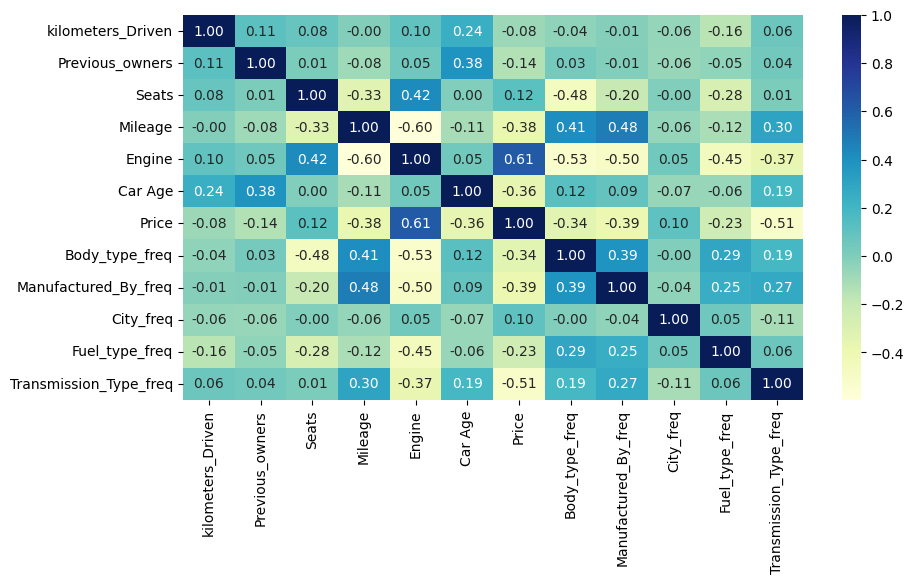

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = ML_Data.corr()


plt.figure(figsize=(10, 5))  


sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')


plt.show()



By seeing this I can able say every column have a correlation with Price. 

                       Strong >--------------< Weak

Positive correlation - Engine > Body_type > Seats

Negative Correlation - Transmission_Type > Mileage > Car Age > Fuel_Type > Previous_Owners > City > Kilometers_Driven > Manufactured_By

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Lets select which data we want to be Feature and which want to be a Target**

In [7]:
Features= ML_Data.drop(columns=['Price'])
Target = ML_Data['Price']

In [8]:
Features.head()

,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Body_type_freq,Manufactured_By_freq,City_freq,Fuel_type_freq,Transmission_Type_freq
0,120000,3,5,23.10,998.0,9,0.429779,0.271103,0.176911,0.666707,0.727569
1,32706,2,5,17.00,1497.0,6,0.262166,0.037314,0.176911,0.666707,0.727569
2,11949,1,5,23.84,1199.0,6,0.429779,0.049994,0.176911,0.666707,0.727569
3,17794,1,5,19.10,1197.0,10,0.260234,0.199010,0.176911,0.666707,0.727569
4,60000,1,5,23.65,1248.0,9,0.262166,0.271103,0.176911,0.319768,0.727569


In [9]:
Target.head()

0    400000
1    811000
2    585000
3    462000
4    790000
Name: Price, dtype: int64

**Spliting the Data for Testing and Trainging**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

**Now let Standardize the values for giving the equal importance for all the Features**

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
print(X_train_scaled)

[[ 0.15073567  0.99268531 -0.30492398 ... -0.23749666  0.69594959
   0.62180732]
 [ 0.02761574 -0.56660981 -0.30492398 ...  0.67070572  0.69594959
   0.62180732]
 [-0.47693387 -0.56660981 -0.30492398 ...  0.16519685  0.69594959
  -1.60821524]
 ...
 [ 0.3717665  -0.56660981 -0.30492398 ...  0.67070572 -1.30215647
   0.62180732]
 [-0.23241475 -0.56660981 -0.30492398 ...  0.62786599  0.69594959
  -1.60821524]
 [-0.10189557 -0.56660981 -0.30492398 ... -0.23749666  0.69594959
   0.62180732]]


In [14]:
import pickle


# Save the model to a file using Pickle
with open('Scale.pkl', 'wb') as file:
   pickle.dump(scaler, file)

**Pickle the Standard Scaler For Future Use**

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


**Now Let's Train the Model and Check Which Model Performs the Best**

In [16]:

# Initialize the models
model_Lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42)
model_rf = RandomForestRegressor(random_state=42, n_estimators= 100)
model_gb = GradientBoostingRegressor(n_estimators = 100)
model_svr = SVR()
model_knn = KNeighborsRegressor(n_neighbors=8)
model_sgd = SGDRegressor()

# Fit each model
model_Lr.fit(X_train_scaled, y_train)
model_dt.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)
model_gb.fit(X_train_scaled, y_train)
model_svr.fit(X_train_scaled, y_train)
model_knn.fit(X_train_scaled, y_train)
model_sgd.fit(X_train_scaled, y_train)


SGDRegressor()

**Now Let Check the Accuracy of the model and findout Which model is a best performer**

In [17]:


# Calculate and print MSE and R^2 for each model
models = {
    "LinearRegression": model_Lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Gradient Boosting": model_gb,
    "Support Vector Regression": model_svr,
    "K-Nearest Neighbors": model_knn,
    "SGDRegressor": model_sgd
}

Model=[]
R2_Evalu=[]
R2_validation=[]
# Iterate through the models to compute and display the metrics
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    Model.append(name)
    R2_Evalu.append(round(r2,2))

    print(f'Evaluation score')
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)

    y_pred_train = model.predict(X_train_scaled)
    mse_1 = mean_squared_error(y_train,y_pred_train) 
    r2_1 = r2_score(y_train,y_pred_train)
    R2_validation.append(round(r2_1,2))

    print(f'Validation score') 
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse_1:.2f}")
    print(f"R^2 Score: {r2_1:.2f}")
    print("-" * 30)



Evaluation score
LinearRegression Model:
Mean Squared Error: 418575922715.51
R^2 Score: 0.58
------------------------------
Validation score
LinearRegression Model:
Mean Squared Error: 437674783271.26
R^2 Score: 0.60
------------------------------
Evaluation score
Decision Tree Model:
Mean Squared Error: 130998483703.94
R^2 Score: 0.87
------------------------------
Validation score
Decision Tree Model:
Mean Squared Error: 141631729.67
R^2 Score: 1.00
------------------------------
Evaluation score
Random Forest Model:
Mean Squared Error: 62329734345.85
R^2 Score: 0.94
------------------------------
Validation score
Random Forest Model:
Mean Squared Error: 10036727688.68
R^2 Score: 0.99
------------------------------
Evaluation score
Gradient Boosting Model:
Mean Squared Error: 85170473047.38
R^2 Score: 0.91
------------------------------
Validation score
Gradient Boosting Model:
Mean Squared Error: 72307874891.87
R^2 Score: 0.93
------------------------------
Evaluation score
Support 

**Now Let Visualize and Check the Accuracy of all the model**

In [18]:
print(Model)
print(R2_Evalu)
print(R2_validation)

['LinearRegression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Regression', 'K-Nearest Neighbors', 'SGDRegressor']
[0.58, 0.87, 0.94, 0.91, -0.08, 0.85, 0.57]
[0.6, 1.0, 0.99, 0.93, -0.09, 0.87, 0.58]


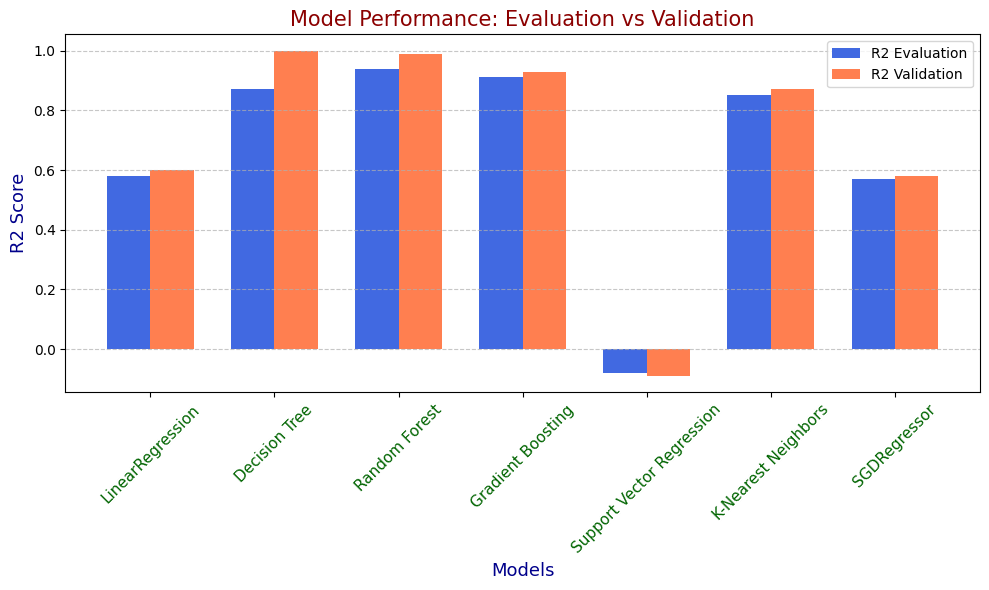

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the grouped bar chart
bar_width = 0.35
index = np.arange(len(Model))

plt.bar(index, R2_Evalu, width=bar_width, color='royalblue', label='R2 Evaluation')
plt.bar(index + bar_width, R2_validation, width=bar_width, color='coral', label='R2 Validation')

# Labeling the chart
plt.xlabel('Models', fontsize=13, color='darkblue')
plt.ylabel('R2 Score', fontsize=13, color='darkblue')
plt.title('Model Performance: Evaluation vs Validation', fontsize=15, color='darkred')

# Adding model names
plt.xticks(index + bar_width / 2, Model, rotation=45, fontsize=11, color='darkgreen')

# Adding a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


**Lets Check the Which feature is Getting the Higher Importance**

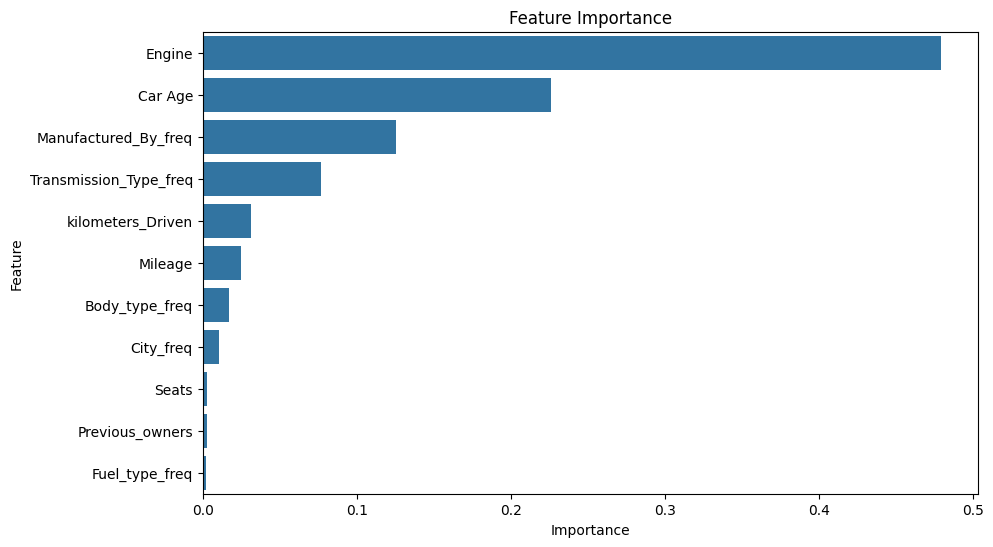

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


feature_importance = model_rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Trying to optimize the R2 score of the Random Forest Regressor**

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define an expanded parameter grid
param_grid = {
    'n_estimators': [20, 50, 100],              # Increased options for number of trees
    'max_depth': [10, 20, 40, None],            # More depth values including deeper trees
    'min_samples_split': [2, 5, 15],             # More variations for splits
    'min_samples_leaf': [1, 2, 6],               # More leaf sizes
    'max_features': [1.0, 'sqrt', 'log2'],      # Use 1.0 instead of 'auto'
    'bootstrap': [True, False]                    # Bootstrap on/off
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_:.4f}")

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions using the best model
Best_y_pred = best_rf.predict(X_test_scaled)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.

Now Let's Check the Evaluation & Validation Scores For the Optimized RandomForest Model

In [57]:
#evaluation
Best_y_pred_eva = best_rf.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, Best_y_pred_eva)
r2_best = r2_score(y_test, Best_y_pred_eva)

print(f'Evaluation score Optimized Random_forest')
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R^2 Score: {r2_best:.2f}")

#validation
Best_y_pred_val = best_rf.predict(X_train_scaled)
mse_1_best = mean_squared_error(y_train,Best_y_pred_val) 
r2_1_best = r2_score(y_train,Best_y_pred_val)

print(f'Validation score Optimized Random_forest') 
print(f"Mean Squared Error: {mse_1_best:.2f}")
print(f"R^2 Score: {r2_1_best:.2f}")


Evaluation score Optimized Random_forest
Mean Squared Error: 63599950549.12
R^2 Score: 0.94
Validation score Optimized Random_forest
Mean Squared Error: 141779511.95
R^2 Score: 1.00


**Simlarly Let Do the same For Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the DecisionTreeRegressor
params = {
    'max_depth': [2, 4, 6, 8, 10, 12, 15, 20],   # Added deeper trees
    'min_samples_split': [2, 3, 4, 5, 10],       # Added more options for minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 6, 8],         # Added more options for minimum samples at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'criterion': ['mse', 'friedman_mse', 'mae'], # Different criteria for splitting
    'splitter': ['best', 'random']               # Strategy used to split at each node
}

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Set up the GridSearchCV
gcv = GridSearchCV(estimator=regressor, param_grid=params, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the grid search on the training data
gcv.fit(X_train_scaled, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", gcv.best_params_)
print("Best R² Score on Training Set: ", gcv.best_score_)

# Evaluate the best model on the test set
best_regressor = gcv.best_estimator_
y_pred = best_regressor.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
print("R² Score on Test Set: ", r2_test)


Let's Check the Evaluation and Validatation Scores after the Optimization

In [60]:
#evaluation
y_pred_Dt_e = best_regressor.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_Dt_e)
r2_best = r2_score(y_test, y_pred_Dt_e)

print(f'Evaluation score Optimized Decition Tree')
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R^2 Score: {r2_best:.2f}")

#validation
y_pred_Dt_V = best_regressor.predict(X_train_scaled)
mse_1_best = mean_squared_error(y_train,y_pred_Dt_V) 
r2_1_best = r2_score(y_train,y_pred_Dt_V)

print(f'Validation score Optimized Decition Tree') 
print(f"Mean Squared Error: {mse_1_best:.2f}")
print(f"R^2 Score: {r2_1_best:.2f}")

Evaluation score Optimized Decition Tree
Mean Squared Error: 106754302345.09
R^2 Score: 0.89
Validation score Optimized Decition Tree
Mean Squared Error: 41266819349.66
R^2 Score: 0.96


**Let' Do the Same for the Gradient Boosting Model**

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 250, 380],        # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],     # Step size shrinkage
    'max_depth': [2, 6, 5,7],                 # Maximum depth of each tree
    'min_samples_split': [2, 6, 8],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 3],          # Minimum samples at a leaf node
    'subsample': [0.4, 0.6, 0.9],           # Fraction of samples used for fitting
    'max_features': [1.0, 'sqrt', 'log2']  # Number of features to consider
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           scoring='r2',          # Optimizing for R² score
                           cv=5,                  # 5-fold cross-validation
                           n_jobs=-1,             # Use all cores
                           verbose=2)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best R² Score on Training Set: ", grid_search.best_score_)

# Evaluate on the test set
best_gbr = grid_search.best_estimator_
y_pred_gbr = best_gbr.predict(X_test_scaled)
r2_test_gbr = r2_score(y_test, y_pred_gbr)
print("R² Score on Test Set: ", r2_test_gbr)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
[CV] END learning_rate=0.01, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.4; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.4; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=250, subsample=0.6; total time=   1.2s
[CV] END learnin

KeyboardInterrupt: 

While Comparing the Before and After Optimization of the Decision Tree and Random Forest Model is also good but there is a possibility for the Overfitting since in both model the Validation score is have a higher diffrence between Validation and Evaluating scores so I go with the Gradient Boosting Model.

Pickling the Best Performing Gradient Boosting Algorithm

In [21]:
import pickle


# Save the model to a file using Pickle
with open('Gradient_boost_model.pkl', 'wb') as file:
   pickle.dump(model_gb, file)

Before Deploying the Streamlit app with the Pickled file Lets Check Manully How Well The Model Is performing And Difference between the Actuall and the Predicted Value 

In [26]:
import pickle
import numpy as np

# Load the pre-trained model
model_path = r'C:\Users\sandy\Desktop\Project_realected_practice\Bank\Gradient_boost_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Load the scaler
scale_path = r'C:\Users\sandy\Desktop\Project_realected_practice\Bank\Scale.pkl'
with open(scale_path, 'rb') as file:
    scaler = pickle.load(file)

# Load frequency mappings from a pickle file
frequency_mappings_path = r'C:\Users\sandy\Desktop\Project_realected_practice\Bank\Fre_en.pkl'  # Update this with your actual path
with open(frequency_mappings_path, 'rb') as file:
    category_mappings = pickle.load(file)

# List of inputs to predict prices for
input_data_list = [
    {
        'City': 'Bangalore',
        'Body_type': 'Hatchback',
        'Fuel_type': 'Petrol',
        'Transmission_Type': 'Manual',
        'Manufactured_By': 'Maruti',
        'kilometers_driven': 120000,
        'previous_owners': 3,
        'seats': 5,
        'mileage': 23.10,
        'engine': 998.0,
        'car_age': 9
    },
    {
        'City': 'Bangalore',
        'Body_type': 'SUV',
        'Fuel_type': 'Petrol',
        'Transmission_Type': 'Manual',
        'Manufactured_By': 'Ford',
        'kilometers_driven': 32706,
        'previous_owners': 2,
        'seats': 5,
        'mileage': 17.00,
        'engine': 1497.0,
        'car_age': 6
    },
    {
        'City': 'Bangalore',
        'Body_type': 'Hatchback',
        'Fuel_type': 'Petrol',
        'Transmission_Type': 'Manual',
        'Manufactured_By': 'Tata',
        'kilometers_driven': 11949,
        'previous_owners': 1,
        'seats': 5,
        'mileage': 23.84,
        'engine': 1199.0,
        'car_age': 6
    },
    {
        'City': 'Bangalore',
        'Body_type': 'Sedan',
        'Fuel_type': 'Petrol',
        'Transmission_Type': 'Manual',
        'Manufactured_By': 'Hyundai',
        'kilometers_driven': 17794,
        'previous_owners': 1,
        'seats': 5,
        'mileage': 19.10,
        'engine': 1197.0,
        'car_age': 10
    },
    {
        'City': 'Bangalore',
        'Body_type': 'SUV',
        'Fuel_type': 'Diesel',
        'Transmission_Type': 'Manual',
        'Manufactured_By': 'Maruti',
        'kilometers_driven': 60000,
        'previous_owners': 1,
        'seats': 5,
        'mileage': 23.65,
        'engine': 1248.0,
        'car_age': 9
    }
]

# Loop through each input and predict the price
for input_data in input_data_list:
    # Encode categorical features using frequency mappings
    encoded_features = [
        category_mappings['Body_type'].get(input_data['Body_type'], 0),
        category_mappings['Manufactured_By'].get(input_data['Manufactured_By'], 0),
        category_mappings['City'].get(input_data['City'], 0),
        category_mappings['Fuel_type'].get(input_data['Fuel_type'], 0),
        category_mappings['Transmission_Type'].get(input_data['Transmission_Type'], 0),
    ]

    # Combine all features into a single input array
    features = np.array([
        input_data['kilometers_driven'],
        input_data['previous_owners'],
        input_data['seats'],
        input_data['mileage'],
        input_data['engine'],
        input_data['car_age'],
        *encoded_features
    ]).reshape(1, -1)

    # Predict the price using the model
    predicted_price = model.predict(scaler.transform(features))[0]

    # Output the result
    print(f"Predicted Vehicle Price for {input_data['Body_type']} ({input_data['Manufactured_By']}): ₹{predicted_price:,.2f}")


Predicted Vehicle Price for Hatchback (Maruti): ₹354,494.15
Predicted Vehicle Price for SUV (Ford): ₹810,774.37
Predicted Vehicle Price for Hatchback (Tata): ₹559,958.39
Predicted Vehicle Price for Sedan (Hyundai): ₹448,565.55
Predicted Vehicle Price for SUV (Maruti): ₹594,849.94


c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScal

# Conclusion : 

>By seeing the My Gradient Boosting Model With 91% Accuracy is performing Very Well When Compare to the Other Model I have Test the Model With The Original Feature Values The Predicted Value is Almost Matching With the Actuall Value.

Actual Price  |   Predicted Price 
------------- |--------------------
400000        |   354,494.15
811000        |   810,774.37
585000        |   559,958.39
462000        |   448,565.55
790000        |   594,849.94
